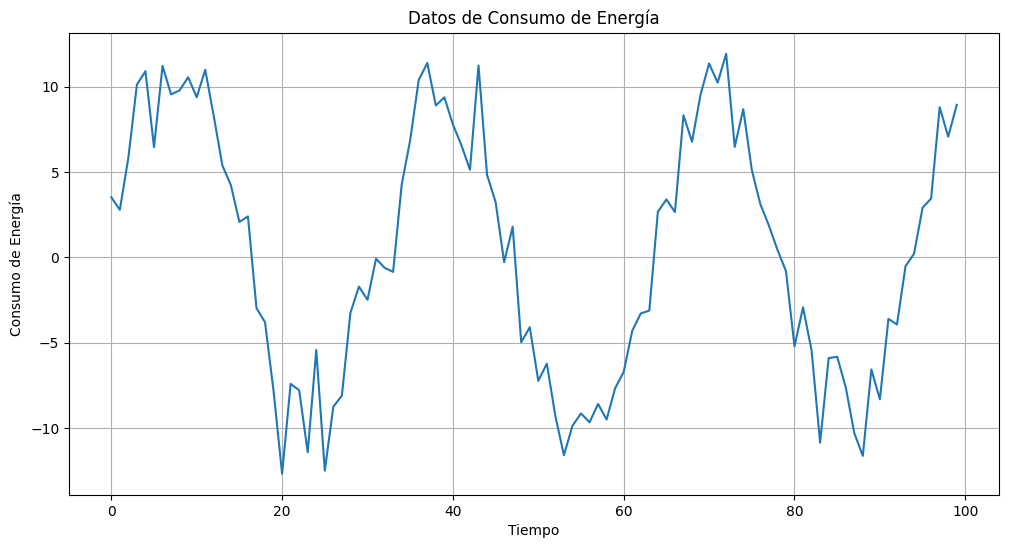

Epoch 1/50
13/13 [==============================] - 1s 3ms/step - loss: 34.6310
Epoch 2/50
13/13 [==============================] - 0s 3ms/step - loss: 28.8199
Epoch 3/50
13/13 [==============================] - 0s 3ms/step - loss: 23.6878
Epoch 4/50
13/13 [==============================] - 0s 3ms/step - loss: 19.7596
Epoch 5/50
13/13 [==============================] - 0s 3ms/step - loss: 16.6721
Epoch 6/50
13/13 [==============================] - 0s 3ms/step - loss: 14.0242
Epoch 7/50
13/13 [==============================] - 0s 3ms/step - loss: 12.5466
Epoch 8/50
13/13 [==============================] - 0s 3ms/step - loss: 11.2108
Epoch 9/50
13/13 [==============================] - 0s 3ms/step - loss: 10.3555
Epoch 10/50
13/13 [==============================] - 0s 3ms/step - loss: 9.8868
Epoch 11/50
13/13 [==============================] - 0s 3ms/step - loss: 9.4981
Epoch 12/50
13/13 [==============================] - 0s 3ms/step - loss: 9.2733
Epoch 13/50
13/13 [=====================

ValueError: ignored

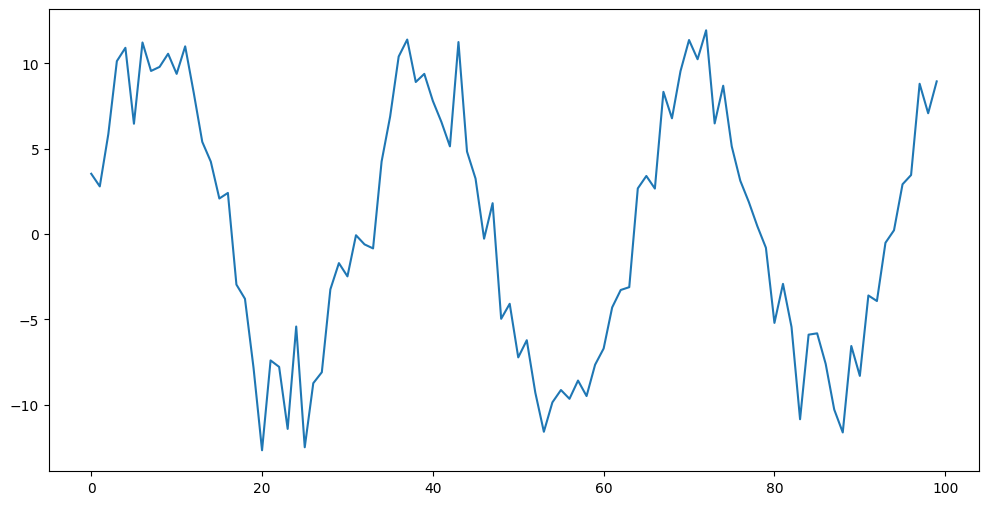

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense

# Generar datos de consumo de energía de ejemplo
np.random.seed(0)
t = np.arange(0, 100, 1)
consumo_energia = 10 * np.sin(0.2 * t) + np.random.normal(0, 2, size=len(t))

# Crear un DataFrame con los datos
data = pd.DataFrame({'tiempo': t, 'consumo_energia': consumo_energia})

# Visualizar los datos
plt.figure(figsize=(12, 6))
plt.plot(data['tiempo'], data['consumo_energia'])
plt.xlabel('Tiempo')
plt.ylabel('Consumo de Energía')
plt.title('Datos de Consumo de Energía')
plt.grid(True)
plt.show()

# Preparar los datos para la red neuronal
X = data['consumo_energia'].values
X_train = X[:-1]  # Usaremos todos los datos excepto el último para entrenar
y_train = X[1:]   # La siguiente muestra como objetivo

# Crear un modelo de RNN simple
model = Sequential()
model.add(SimpleRNN(32, activation='relu', input_shape=(1, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Entrenar el modelo
X_train = X_train.reshape(-1, 1, 1)
model.fit(X_train, y_train, epochs=50, batch_size=8)

# Hacer una proyección con la red neuronal
X_test = X[-1].reshape(1, 1, 1)
predictions = []

for _ in range(50):
    prediction = model.predict(X_test)
    predictions.append(prediction)
    X_test = np.roll(X_test, -1)  # Desplazar los datos de entrada
    X_test[-1][-1][0] = prediction[0][0]  # Agregar la predicción al final

# Visualizar la proyección
plt.figure(figsize=(12, 6))
plt.plot(data['tiempo'], data['consumo_energia'], label='Datos reales')
plt.plot(np.arange(100, 150), predictions, label='Proyección', linestyle='dashed', color='orange')
plt.xlabel('Tiempo')
plt.ylabel('Consumo de Energía')
plt.title('Proyección de Consumo de Energía con una RNN')
plt.legend()
plt.grid(True)
plt.show()